In [5]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
import tensorflow as tf

In [7]:

# Define the directory paths
normal_dir = 'chest_xray/train/NORMAL'
pneumonia_dir = 'chest_xray/train/PNEUMONIA'

# Get the list of all files in each directory
normal_files = [os.path.join(normal_dir, file) for file in os.listdir(normal_dir)]
pneumonia_files = [os.path.join(pneumonia_dir, file) for file in os.listdir(pneumonia_dir)]

# Create a DataFrame
train_df = pd.DataFrame({
    'file': normal_files + pneumonia_files,
    'label': ['normal'] * len(normal_files) + ['pneumonia'] * len(pneumonia_files)
})

print(train_df)

                                                   file      label
0                     chest_xray/train/NORMAL/.DS_Store     normal
1             chest_xray/train/NORMAL/IM-0115-0001.jpeg     normal
2             chest_xray/train/NORMAL/IM-0117-0001.jpeg     normal
3             chest_xray/train/NORMAL/IM-0119-0001.jpeg     normal
4             chest_xray/train/NORMAL/IM-0122-0001.jpeg     normal
...                                                 ...        ...
5213  chest_xray/train/PNEUMONIA/person99_virus_183....  pneumonia
5214  chest_xray/train/PNEUMONIA/person9_bacteria_38...  pneumonia
5215  chest_xray/train/PNEUMONIA/person9_bacteria_39...  pneumonia
5216  chest_xray/train/PNEUMONIA/person9_bacteria_40...  pneumonia
5217  chest_xray/train/PNEUMONIA/person9_bacteria_41...  pneumonia

[5218 rows x 2 columns]


In [8]:
# Define the directory paths
normal_dir = 'chest_xray/test/NORMAL'
pneumonia_dir = 'chest_xray/test/PNEUMONIA'

# Get the list of all files in each directory
normal_files = [os.path.join(normal_dir, file) for file in os.listdir(normal_dir)]
pneumonia_files = [os.path.join(pneumonia_dir, file) for file in os.listdir(pneumonia_dir)]

# Create a DataFrame
test_df = pd.DataFrame({
    'file': normal_files + pneumonia_files,
    'label': ['normal'] * len(normal_files) + ['pneumonia'] * len(pneumonia_files)
})

print(test_df)

                                                  file      label
0             chest_xray/test/NORMAL/IM-0001-0001.jpeg     normal
1             chest_xray/test/NORMAL/IM-0003-0001.jpeg     normal
2             chest_xray/test/NORMAL/IM-0005-0001.jpeg     normal
3             chest_xray/test/NORMAL/IM-0006-0001.jpeg     normal
4             chest_xray/test/NORMAL/IM-0007-0001.jpeg     normal
..                                                 ...        ...
619  chest_xray/test/PNEUMONIA/person96_bacteria_46...  pneumonia
620  chest_xray/test/PNEUMONIA/person96_bacteria_46...  pneumonia
621  chest_xray/test/PNEUMONIA/person97_bacteria_46...  pneumonia
622  chest_xray/test/PNEUMONIA/person99_bacteria_47...  pneumonia
623  chest_xray/test/PNEUMONIA/person99_bacteria_47...  pneumonia

[624 rows x 2 columns]


In [9]:
# Define the directory paths
normal_dir = 'chest_xray/val/NORMAL'
pneumonia_dir = 'chest_xray/val/PNEUMONIA'

# Get the list of all files in each directory
normal_files = [os.path.join(normal_dir, file) for file in os.listdir(normal_dir)]
pneumonia_files = [os.path.join(pneumonia_dir, file) for file in os.listdir(pneumonia_dir)]

# Create a DataFrame
val_df = pd.DataFrame({
    'file': normal_files + pneumonia_files,
    'label': ['normal'] * len(normal_files) + ['pneumonia'] * len(pneumonia_files)
})

print(val_df)

                                                 file      label
0                     chest_xray/val/NORMAL/.DS_Store     normal
1     chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg     normal
2     chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg     normal
3     chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg     normal
4     chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg     normal
5     chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg     normal
6     chest_xray/val/NORMAL/NORMAL2-IM-1438-0001.jpeg     normal
7     chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg     normal
8     chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg     normal
9                  chest_xray/val/PNEUMONIA/.DS_Store  pneumonia
10  chest_xray/val/PNEUMONIA/person1946_bacteria_4...  pneumonia
11  chest_xray/val/PNEUMONIA/person1946_bacteria_4...  pneumonia
12  chest_xray/val/PNEUMONIA/person1947_bacteria_4...  pneumonia
13  chest_xray/val/PNEUMONIA/person1949_bacteria_4...  pneumonia
14  chest_xray/val/PNEUMO

Générateur des images

In [10]:
# Initialize the ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255.,  # scale pixel values to [0, 1]
    shear_range=0.2,  # randomly apply shearing transformations
    zoom_range=0.2,  # randomly zooming inside pictures
    horizontal_flip=True  # randomly flip half of the images horizontally
)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="file",
    y_col="label",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="file",
    y_col="label",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

test_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="file",
    y_col="label",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')


Found 5216 validated image filenames belonging to 2 classes.


/home/user/anaconda3/lib/python3.11/site-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 2 invalid image filename(s) in x_col="file". These filename(s) will be ignored.
  warnings.warn(


Found 16 validated image filenames belonging to 2 classes.


/home/user/anaconda3/lib/python3.11/site-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 2 invalid image filename(s) in x_col="file". These filename(s) will be ignored.
  warnings.warn(


Found 624 validated image filenames belonging to 2 classes.


Création du modèle

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

Entraînement du modèle

In [14]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # nombre d'images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # nombre d'images = batch_size * steps
      verbose=2)

Epoch 1/15


2024-03-05 14:34:30.117554: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-03-05 14:34:30.659872: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-05 14:34:32.069362: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-05 14:34:32.661972: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f54288f0df0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-05 14:34:32.662030: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2024-03-05 14:34:32.687060: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1709645672.769820    3771 devic

KeyboardInterrupt: 

In [15]:
model.evaluate(test_generator)

20/20 [==============================] - 4s 221ms/step - loss: 0.5625 - accuracy: 0.7821


[0.5625074505805969, 0.7820512652397156]

NameError: name 'history' is not defined

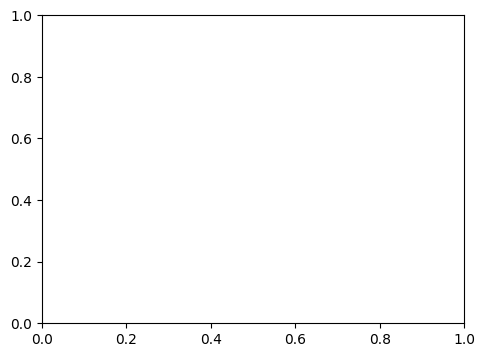

In [1]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
